In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/AIML')

Mounted at /content/drive


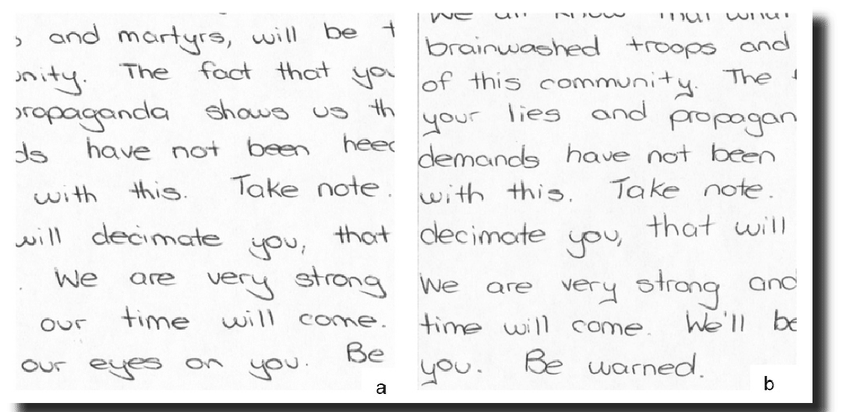

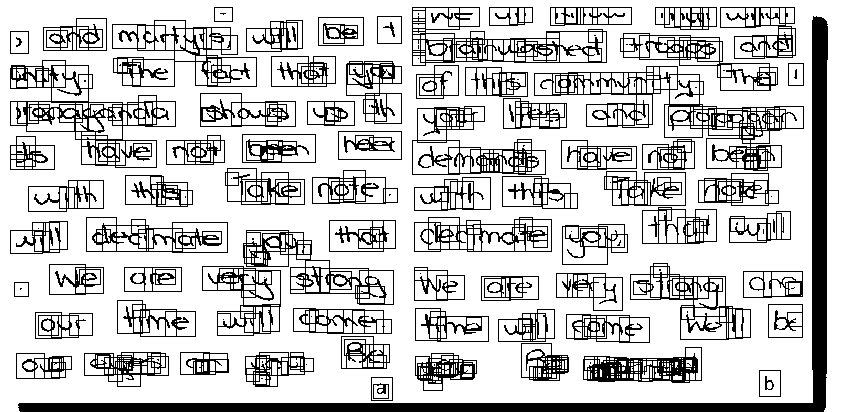

-1

In [35]:
#import libraries
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

img = cv2.imread('/content/drive/MyDrive/AIML/Sample/handwriting-sample.png')
#cv2.imshow("",img) not available in colab

img1 =cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#ret,thres =cv2.threshold(img1,200,255,cv2.THRESH_BINARY)
thres =cv2.adaptiveThreshold(img1,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,125,60)

#find controur
cnts,hier = cv2.findContours(thres,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)



for c in cnts:
  M=cv2.moments(c)
  try:
    cX = int(M["m10"]/M["m00"])
    cY = int(M["m01"]/M["m00"])

    cv2.drawContours(img,[c],-1,(0,255,0),2)
    cv2.circle(img,(cX,cY),7,(255,255,255),-1)
  except:
     pass 



  epsilon = 0.01*cv2.arcLength(c,True)
  data = cv2.approxPolyDP(c,epsilon,True)

  hull = cv2.convexHull(data)
  x,y,w,h = cv2.boundingRect(hull)
  thres =cv2.rectangle(thres,(x-5,y-5),(x+w+5,y+h+5),(0,2,2),1)



  
cv2_imshow(img1)
cv2_imshow(thres)
cv2.waitKey(0)


